# 1.从分类汇总到数据透视

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 载入京东数据集
df_jd = pd.read_csv('./JD.csv',encoding = 'gbk')

In [3]:
df_jd.head()

,商品名称,一级分类,二级分类,7天点击量,定价,订单预定
0,ASP.NET项目开发实战入门（全彩版）,编程语言与程序设计,ASP.NET,35,69.8,1
1,PHP项目开发实战入门（全彩版）,编程语言与程序设计,PHP,49,69.8,0
2,Java精彩编程200例（全彩版）,编程语言与程序设计,Java,51,79.8,2
3,零基础学PHP（全彩版）,编程语言与程序设计,PHP,64,79.8,1
4,JSP项目开发实战入门（全彩版）,编程语言与程序设计,JSP/JavaWeb,26,69.8,0


## 1.1 针对多列的分类汇总-层次化索引

每个二级分类下的7天点击量和订单预定总和

In [4]:
# df_jd.groupby('二级分类').7天点击量.sum()
# 报错，因为7天点击量不是有效的变量名，不能使用点语法进行列的访问

In [5]:
df_jd.groupby('二级分类')['7天点击量'].sum()

二级分类
ASP.NET           87
Android          261
C#               314
C++/C语言          724
HTML             188
JSP/JavaWeb      157
Java             408
JavaScript       100
Oracle            58
PHP              113
Python          2449
SQL              128
Visual Basic      28
WEB前端             57
Name: 7天点击量, dtype: int64

In [6]:
df_jd.groupby('二级分类')[['7天点击量','订单预定']].sum()
# 用一个分组字段进行多个字段的汇总

,7天点击量,订单预定
二级分类,,
ASP.NET,87,2
Android,261,7
C#,314,12
C++/C语言,724,28
HTML,188,8
JSP/JavaWeb,157,1
Java,408,16
JavaScript,100,7
Oracle,58,2


每个一级分类下，每个二级分类的平均价格

In [7]:
df_jd.groupby('二级分类').定价.mean()

二级分类
ASP.NET         74.800000
Android         89.600000
C#              79.800000
C++/C语言         68.133333
HTML            79.800000
JSP/JavaWeb     69.800000
Java            82.100000
JavaScript      79.800000
Oracle          79.800000
PHP             74.800000
Python          96.850000
SQL             49.800000
Visual Basic    79.800000
WEB前端           49.800000
Name: 定价, dtype: float64

In [8]:
df_jd.groupby('一级分类').定价.mean()

一级分类
数据库           64.800000
移动开发          89.600000
编程语言与程序设计     78.441667
网页制作/Web技术    69.800000
Name: 定价, dtype: float64

In [9]:
# 多字段分组
df_jd.groupby(['一级分类', '二级分类'])[['定价']].mean()

定价
一级分类       二级分类                   
数据库        Oracle        79.800000
           SQL           49.800000
移动开发       Android       89.600000
编程语言与程序设计  ASP.NET       74.800000
           C#            79.800000
           C++/C语言       68.133333
           JSP/JavaWeb   69.800000
           Java          82.100000
           PHP           74.800000
           Python        96.850000
           Visual Basic  79.800000
网页制作/Web技术 HTML          79.800000
           JavaScript    79.800000
           WEB前端         49.800000

In [10]:
df_jd.groupby(['一级分类', '二级分类'])[['定价']].mean().index

MultiIndex([(       '数据库',       'Oracle'),
            (       '数据库',          'SQL'),
            (      '移动开发',      'Android'),
            ( '编程语言与程序设计',      'ASP.NET'),
            ( '编程语言与程序设计',           'C#'),
            ( '编程语言与程序设计',      'C++/C语言'),
            ( '编程语言与程序设计',  'JSP/JavaWeb'),
            ( '编程语言与程序设计',         'Java'),
            ( '编程语言与程序设计',          'PHP'),
            ( '编程语言与程序设计',       'Python'),
            ( '编程语言与程序设计', 'Visual Basic'),
            ('网页制作/Web技术',         'HTML'),
            ('网页制作/Web技术',   'JavaScript'),
            ('网页制作/Web技术',        'WEB前端')],
           names=['一级分类', '二级分类'])

当使用多个字段进行分组时，分类汇总的结果是一个具有层次化索引的数据集，用来进行分组的字段会成为层次化索引中的不同层级，靠近groupby的字段成为层次化索引的外层，靠近汇总字段（远离groupby）的字段成为层次化索引的内层

## 1.2 从层次化索引到数据透视

In [11]:
# 构建一个具有层次化索引的Series
s1 = pd.Series(
    np.random.randint(1,11,12),
    index = [
        ['a'] * 3 + ['b'] * 3 + ['c'] * 3 + ['d'] * 3,
        [1,2,3] * 4
    ]
)

In [12]:
s1

a  1     4
   2     6
   3     6
b  1     3
   2     4
   3     4
c  1     8
   2     3
   3    10
d  1     8
   2     5
   3     2
dtype: int32

In [13]:
s1.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('c', 3),
            ('d', 1),
            ('d', 2),
            ('d', 3)],
           )

    具有层次化索引的Series --> 类似于数据透视表的DataFrame
    将行旋转到列上 ：unstack()
    透视：低维度表格转换为高维度表格

In [14]:
s1.unstack()

,1,2,3
a,4,6,6
b,3,4,4
c,8,3,10
d,8,5,2


In [15]:
# 构建一个类似数据透视表的DataFrame
dft1 = pd.DataFrame(
    np.random.randint(10,21,(2,3)),
    index = pd.Index(['北京' ,'上海'], name = 'city'),
    columns = pd.Index([2019,2020,2021], name = 'year')
)

In [16]:
dft1

year,2019,2020,2021
city,,,
北京,13,17,20
上海,13,17,16


    类似数据透视表的DataFrame --> 具有层次化索引的Series
    将列旋转到行上 ：stack()
    逆透视：高维度表格转换为低维度表格

In [17]:
dft1.stack()

city  year
北京    2019    13
      2020    17
      2021    20
上海    2019    13
      2020    17
      2021    16
dtype: int32

In [18]:
dft1.stack().index

MultiIndex([('北京', 2019),
            ('北京', 2020),
            ('北京', 2021),
            ('上海', 2019),
            ('上海', 2020),
            ('上海', 2021)],
           names=['city', 'year'])

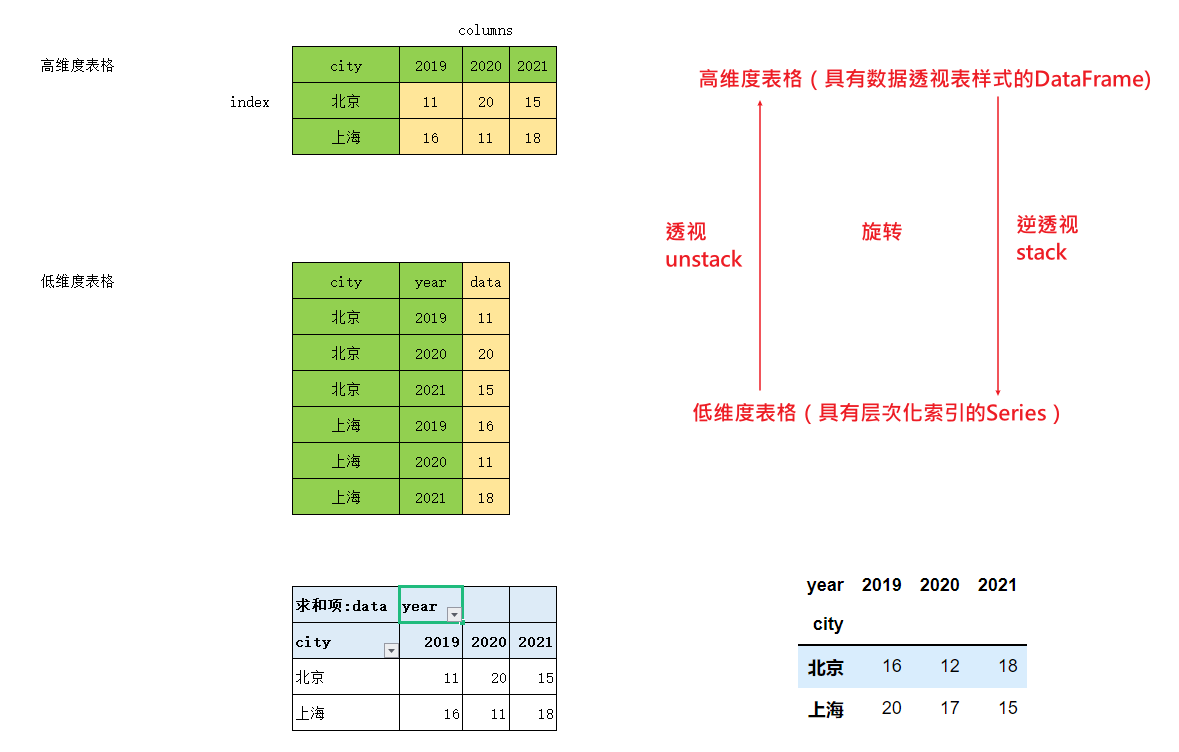

## 1.3 从数据表到数据透视表

    先做多级的groupby,再进行汇总，最后unstack

In [19]:
df_jd.groupby(['一级分类', '二级分类']).定价.mean().unstack()

二级分类,ASP.NET,Android,C#,C++/C语言,HTML,JSP/JavaWeb,Java,JavaScript,Oracle,PHP,Python,SQL,Visual Basic,WEB前端
一级分类,,,,,,,,,,,,,,
数据库,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.8,NaN,NaN,49.8,NaN,NaN
移动开发,NaN,89.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
编程语言与程序设计,74.8,NaN,79.8,68.133333,NaN,69.8,82.1,NaN,NaN,74.8,96.85,NaN,79.8,NaN
网页制作/Web技术,NaN,NaN,NaN,NaN,79.8,NaN,NaN,79.8,NaN,NaN,NaN,NaN,NaN,49.8


In [20]:
df_jd.groupby(['一级分类', '二级分类']).定价.mean()

一级分类        二级分类        
数据库         Oracle          79.800000
            SQL             49.800000
移动开发        Android         89.600000
编程语言与程序设计   ASP.NET         74.800000
            C#              79.800000
            C++/C语言         68.133333
            JSP/JavaWeb     69.800000
            Java            82.100000
            PHP             74.800000
            Python          96.850000
            Visual Basic    79.800000
网页制作/Web技术  HTML            79.800000
            JavaScript      79.800000
            WEB前端           49.800000
Name: 定价, dtype: float64

载入银行数据集

In [21]:
df_bank = pd.read_csv('data/bank-full.csv', sep = ';')

In [22]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [23]:
df_bank.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

不同职业的人群中，购买和不购买的人数分别有多少？

In [24]:
df_bank.groupby(['job','y']).age.count()

job            y  
admin.         no     4540
               yes     631
blue-collar    no     9024
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8157
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3785
               yes     369
student        no      669
               yes     269
technician     no     6757
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
Name: age, dtype: int64

In [25]:
df_bank.groupby(['job','y']).age.count().index

MultiIndex([(       'admin.',  'no'),
            (       'admin.', 'yes'),
            (  'blue-collar',  'no'),
            (  'blue-collar', 'yes'),
            ( 'entrepreneur',  'no'),
            ( 'entrepreneur', 'yes'),
            (    'housemaid',  'no'),
            (    'housemaid', 'yes'),
            (   'management',  'no'),
            (   'management', 'yes'),
            (      'retired',  'no'),
            (      'retired', 'yes'),
            ('self-employed',  'no'),
            ('self-employed', 'yes'),
            (     'services',  'no'),
            (     'services', 'yes'),
            (      'student',  'no'),
            (      'student', 'yes'),
            (   'technician',  'no'),
            (   'technician', 'yes'),
            (   'unemployed',  'no'),
            (   'unemployed', 'yes'),
            (      'unknown',  'no'),
            (      'unknown', 'yes')],
           names=['job', 'y'])

In [26]:
df_bank.groupby(['job','y']).age.count().unstack()

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


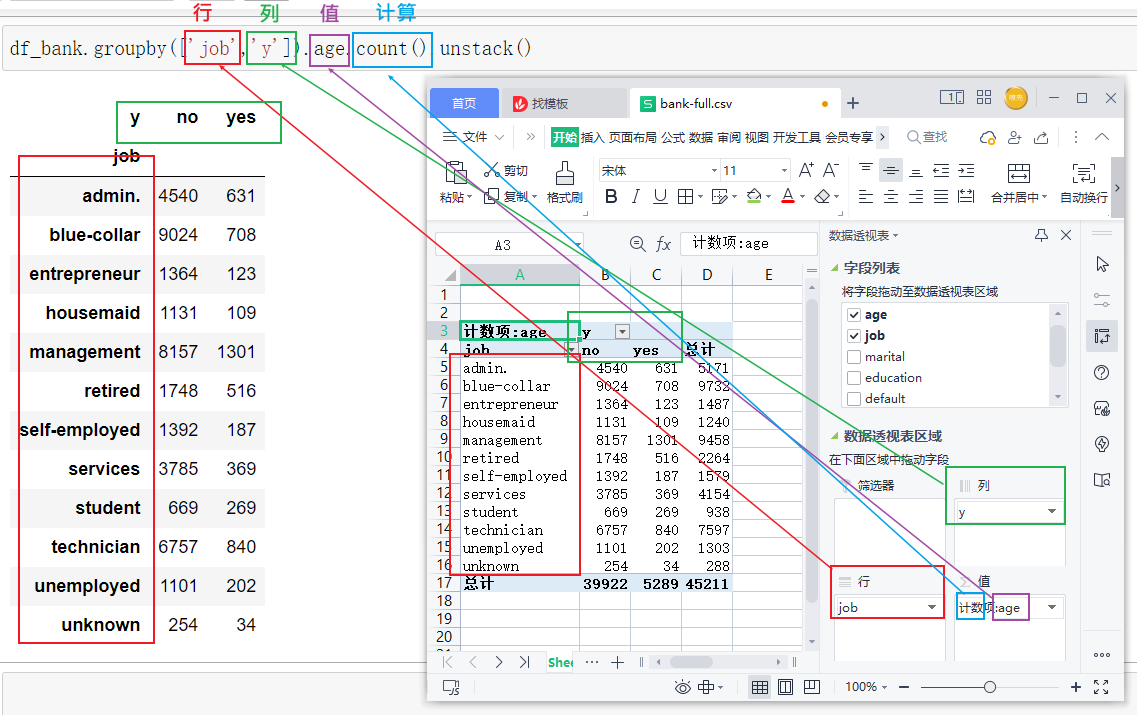

不同学历，不同婚姻状况的客户，在购买和不购买的情况下，平均年龄是多少

In [27]:
df_bank.groupby(['education','marital','y']).age.mean()

education  marital   y  
primary    divorced  no     50.165123
                     yes    59.778846
           married   no     45.982062
                     yes    53.515152
           single    no     37.014436
                     yes    33.967033
secondary  divorced  no     43.889065
                     yes    47.195876
           married   no     42.071394
                     yes    45.151840
           single    no     33.394308
                     yes    31.559064
tertiary   divorced  no     45.196372
                     yes    46.886700
           married   no     42.011592
                     yes    44.281490
           single    no     34.033998
                     yes    32.860227
unknown    divorced  no     49.434483
                     yes    48.458333
           married   no     47.517682
                     yes    53.802817
           single    no     35.477376
                     yes    30.593023
Name: age, dtype: float64

In [28]:
df_bank.groupby(['education','marital','y']).age.mean().index

MultiIndex([(  'primary', 'divorced',  'no'),
            (  'primary', 'divorced', 'yes'),
            (  'primary',  'married',  'no'),
            (  'primary',  'married', 'yes'),
            (  'primary',   'single',  'no'),
            (  'primary',   'single', 'yes'),
            ('secondary', 'divorced',  'no'),
            ('secondary', 'divorced', 'yes'),
            ('secondary',  'married',  'no'),
            ('secondary',  'married', 'yes'),
            ('secondary',   'single',  'no'),
            ('secondary',   'single', 'yes'),
            ( 'tertiary', 'divorced',  'no'),
            ( 'tertiary', 'divorced', 'yes'),
            ( 'tertiary',  'married',  'no'),
            ( 'tertiary',  'married', 'yes'),
            ( 'tertiary',   'single',  'no'),
            ( 'tertiary',   'single', 'yes'),
            (  'unknown', 'divorced',  'no'),
            (  'unknown', 'divorced', 'yes'),
            (  'unknown',  'married',  'no'),
            (  'unknown',  'marrie

In [29]:
df_bank.groupby(['education','marital','y']).age.mean().unstack()

y                          no        yes
education marital                       
primary   divorced  50.165123  59.778846
          married   45.982062  53.515152
          single    37.014436  33.967033
secondary divorced  43.889065  47.195876
          married   42.071394  45.151840
          single    33.394308  31.559064
tertiary  divorced  45.196372  46.886700
          married   42.011592  44.281490
          single    34.033998  32.860227
unknown   divorced  49.434483  48.458333
          married   47.517682  53.802817
          single    35.477376  30.593023

## 1.4 数据透视表 pivot_table

    pd.DataFrame.pivot_table(
        self,
        values=None,         # 数据透视表的值
        index=None,          # 数据透视表的行
        columns=None,        # 数据透视表的列
        aggfunc='mean',       # 数据透视表的计算，可以使用[],{}进行更复杂的操作
        fill_value=None,      # 针对数据透视表中的缺失值进行填充
        margins=False,       # 是否显示总计
        dropna=True,
        margins_name='All',    # 总计的行/列名称，和margins配合使用
        observed=False,
        sort=True,
    ) -> 'DataFrame'

不同职业的人群，购买和不购买的人数分别有多少

In [30]:
df_bank.pivot_table(
    index = 'job',
    columns = 'y',
    values = 'age',
    aggfunc = 'count'
)

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


In [31]:
# 加入总计
df_bank.pivot_table(
    index = 'job',
    columns = 'y',
    values = 'age',
    aggfunc = 'count',
    margins = True,
    margins_name = '总计'
)

y,no,yes,总计
job,,,
admin.,4540,631,5171
blue-collar,9024,708,9732
entrepreneur,1364,123,1487
housemaid,1131,109,1240
management,8157,1301,9458
retired,1748,516,2264
self-employed,1392,187,1579
services,3785,369,4154
student,669,269,938


不同受教育程度和婚姻状况的人群，平均年龄是多少

In [32]:
df_bank.pivot_table(
    index = 'education',
    columns = 'marital',
    values = 'age',
    aggfunc = 'mean'
)

marital,divorced,married,single
education,,,
primary,51.494681,46.550705,36.689332
secondary,44.230906,42.363108,33.157171
tertiary,45.429640,42.306053,33.818447
unknown,49.295858,48.287069,34.681818


只有行，没有列的数据透视表

In [33]:
df_bank.pivot_table(
    index = ['job','y'],
    values = 'age',
    aggfunc = 'count'
)

age
job           y        
admin.        no   4540
              yes   631
blue-collar   no   9024
              yes   708
entrepreneur  no   1364
              yes   123
housemaid     no   1131
              yes   109
management    no   8157
              yes  1301
retired       no   1748
              yes   516
self-employed no   1392
              yes   187
services      no   3785
              yes   369
student       no    669
              yes   269
technician    no   6757
              yes   840
unemployed    no   1101
              yes   202
unknown       no    254
              yes    34

更复杂的数据透视表  
不同学历，不同婚姻状况的人群，其人数和平均年龄

In [34]:
df_bank.pivot_table(
    index = 'education',
    columns = 'marital',
    values = 'age',
    aggfunc = ['count', 'mean']
)
# 将aggfunc设置为列表，可以进行不同的聚合操作

count                      mean                      
marital   divorced married single   divorced    married     single
education                                                         
primary        752    5246    853  51.494681  46.550705  36.689332
secondary     2815   13770   6617  44.230906  42.363108  33.157171
tertiary      1471    7038   4792  45.429640  42.306053  33.818447
unknown        169    1160    528  49.295858  48.287069  34.681818

不同学历，不同婚姻状况的人群，其平均年龄和最长通话时间是多少？

In [35]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [36]:
df_bank.pivot_table(
    index = 'education',
    columns = 'marital',
    values = ['age','duration'],
    aggfunc = ['mean', 'max']
)
# 如果aggfunc是列表，则将列表中的每个运算均匀分配到每个values内容上

mean                                                \
                 age                          duration               
marital     divorced    married     single    divorced     married   
education                                                            
primary    51.494681  46.550705  36.689332  273.042553  251.259055   
secondary  44.230906  42.363108  33.157171  257.512256  255.101670   
tertiary   45.429640  42.306053  33.818447  263.249490  252.082836   
unknown    49.295858  48.287069  34.681818  292.674556  251.173276   

                           max                                         
                           age                duration                 
marital        single divorced married single divorced married single  
education                                                              
primary    269.594373       95      89     83     2456    3078   2653  
secondary  266.643494       94      95     86     3094    3881   3785  
tertiary   266.518364       82      89     72     2087    4918   3253  
unknown    259.486742       86      93     72     1563    1812   2429

In [37]:
df_bank.pivot_table(
    index = 'education',
    columns = 'marital',
    values = ['age','duration'],
    # aggfunc = ['mean', 'max']
    aggfunc = {'age':'mean', 'duration':['max', 'min', 'count']}
)
# 如果aggfunc是字典，则可以针对不同的值进行不同的计算

age                       duration                          \
                mean                          count                     max   
marital     divorced    married     single divorced married single divorced   
education                                                                     
primary    51.494681  46.550705  36.689332      752    5246    853     2456   
secondary  44.230906  42.363108  33.157171     2815   13770   6617     3094   
tertiary   45.429640  42.306053  33.818447     1471    7038   4792     2087   
unknown    49.295858  48.287069  34.681818      169    1160    528     1563   

                                                  
                              min                 
marital   married single divorced married single  
education                                         
primary      3078   2653        7       0      4  
secondary    3881   3785        1       0      4  
tertiary     4918   3253        4       4      2  
unknown      1812   2429        4       7      4

# 2.从数据透视表到数据交叉表
## 2.1 针对小费数据集进行分析

In [38]:
# 载入数据
tips = pd.read_csv('data/tips.csv')

In [39]:
tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
tips.drop('Unnamed: 0', axis = 1, inplace = True)

In [41]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


研究给小费最慷慨的前5桌顾客

In [42]:
# 先排序，再提取
tips.sort_values(by = 'tip', ascending = False).head(5)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6


标准化：在tip后面插入一列，存储小费占总金额的百分比

In [43]:
tips.insert(2, 'tip_percent', tips.tip / tips.total_bill)

In [44]:
tips.head()

,total_bill,tip,tip_percent,sex,smoker,day,time,size
0,16.99,1.01,0.059447,Female,No,Sun,Dinner,2
1,10.34,1.66,0.160542,Male,No,Sun,Dinner,3
2,21.01,3.50,0.166587,Male,No,Sun,Dinner,3
3,23.68,3.31,0.139780,Male,No,Sun,Dinner,2
4,24.59,3.61,0.146808,Female,No,Sun,Dinner,4


In [45]:
# 给小费最慷慨的前三桌顾客
tips.sort_values(by = 'tip_percent' , ascending = False).head(3)

,total_bill,tip,tip_percent,sex,smoker,day,time,size
172,7.25,5.15,0.710345,Male,Yes,Sun,Dinner,2
178,9.60,4.00,0.416667,Female,Yes,Sun,Dinner,2
67,3.07,1.00,0.325733,Female,Yes,Sat,Dinner,1


定义一个函数，可以返回按照指定的列进行降序排列后提取前n名的结果

    将某个操作转换为函数：
    重点是找出该操作中不变和变化的部分，不变的部分照抄（操作的代码），要变的部分转换成用参数进行处理（操作中涉及到的 对象）

In [46]:
def topn(df = tips, by = 'tip_percent', n = 3):
    """
    函数说明：返回按照指定的列进行降序排列后提取前n名的结果
    函数参数：
        df : 用来进行排序的数据集，默认是tips
        by : 用来进行排序的数据列，默认是tip_percent
        n : 最终获取的前几名
    """
    return df.sort_values(by = by, ascending = False).head(n)
    # 前一个by是sort_values的参数，后一个by是topn的参数

In [47]:
topn()

,total_bill,tip,tip_percent,sex,smoker,day,time,size
172,7.25,5.15,0.710345,Male,Yes,Sun,Dinner,2
178,9.60,4.00,0.416667,Female,Yes,Sun,Dinner,2
67,3.07,1.00,0.325733,Female,Yes,Sat,Dinner,1


总金额最高的前5桌顾客

In [48]:
topn(by = 'total_bill', n = 5)

,total_bill,tip,tip_percent,sex,smoker,day,time,size
170,50.81,10.00,0.196812,Male,Yes,Sat,Dinner,3
212,48.33,9.00,0.186220,Male,No,Sat,Dinner,4
59,48.27,6.73,0.139424,Male,No,Sat,Dinner,4
156,48.17,5.00,0.103799,Male,No,Sun,Dinner,6
182,45.35,3.50,0.077178,Male,Yes,Sun,Dinner,3


小费最高的前3桌顾客

In [49]:
topn(by = 'tip', n = 3)

,total_bill,tip,tip_percent,sex,smoker,day,time,size
170,50.81,10.00,0.196812,Male,Yes,Sat,Dinner,3
212,48.33,9.00,0.186220,Male,No,Sat,Dinner,4
23,39.42,7.58,0.192288,Male,No,Sat,Dinner,4


按是否吸烟分组，观察小费慷慨程度前5名

In [50]:
tips.groupby('smoker')

In [51]:
# topn(df = tips.groupby('smoker'), n = 5)
# 在groupby之后得到DataFrameGroupBy对象上没有sort_values方法，因此会报错

按是否吸烟分组，观察两组人群小费的平均值

In [52]:
tips.groupby('smoker').tip.mean()
# 先分组，再筛选，最后汇总

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

In [53]:
tips[['smoker', 'tip']].groupby('smoker').mean()
# 先筛选，再分类，最后汇总

,tip
smoker,
No,2.991854
Yes,3.008710


按是否吸烟分组，观察小费慷慨程度前5名  
先筛选，再统计，最后汇总

In [54]:
topn(tips[tips.smoker == 'Yes'], n=5)
# 吸烟人群中，小费慷慨程度前5名

,total_bill,tip,tip_percent,sex,smoker,day,time,size
172,7.25,5.15,0.710345,Male,Yes,Sun,Dinner,2
178,9.60,4.00,0.416667,Female,Yes,Sun,Dinner,2
67,3.07,1.00,0.325733,Female,Yes,Sat,Dinner,1
183,23.17,6.50,0.280535,Male,Yes,Sun,Dinner,4
109,14.31,4.00,0.279525,Female,Yes,Sat,Dinner,2


In [55]:
topn(tips[tips.smoker == 'No'], n=5)
# 不吸烟人群中，小费慷慨程度前5名

,total_bill,tip,tip_percent,sex,smoker,day,time,size
232,11.61,3.39,0.291990,Male,No,Sat,Dinner,2
149,7.51,2.00,0.266312,Male,No,Thur,Lunch,2
51,10.29,2.60,0.252672,Female,No,Sun,Dinner,2
185,20.69,5.00,0.241663,Male,No,Sun,Dinner,5
88,24.71,5.85,0.236746,Male,No,Thur,Lunch,2


In [56]:
pd.concat(
    (topn(tips[tips.smoker == 'Yes'], n=5), topn(tips[tips.smoker == 'No'], n=5))
)

,total_bill,tip,tip_percent,sex,smoker,day,time,size
172,7.25,5.15,0.710345,Male,Yes,Sun,Dinner,2
178,9.60,4.00,0.416667,Female,Yes,Sun,Dinner,2
67,3.07,1.00,0.325733,Female,Yes,Sat,Dinner,1
183,23.17,6.50,0.280535,Male,Yes,Sun,Dinner,4
109,14.31,4.00,0.279525,Female,Yes,Sat,Dinner,2
232,11.61,3.39,0.291990,Male,No,Sat,Dinner,2
149,7.51,2.00,0.266312,Male,No,Thur,Lunch,2
51,10.29,2.60,0.252672,Female,No,Sun,Dinner,2
185,20.69,5.00,0.241663,Male,No,Sun,Dinner,5
88,24.71,5.85,0.236746,Male,No,Thur,Lunch,2


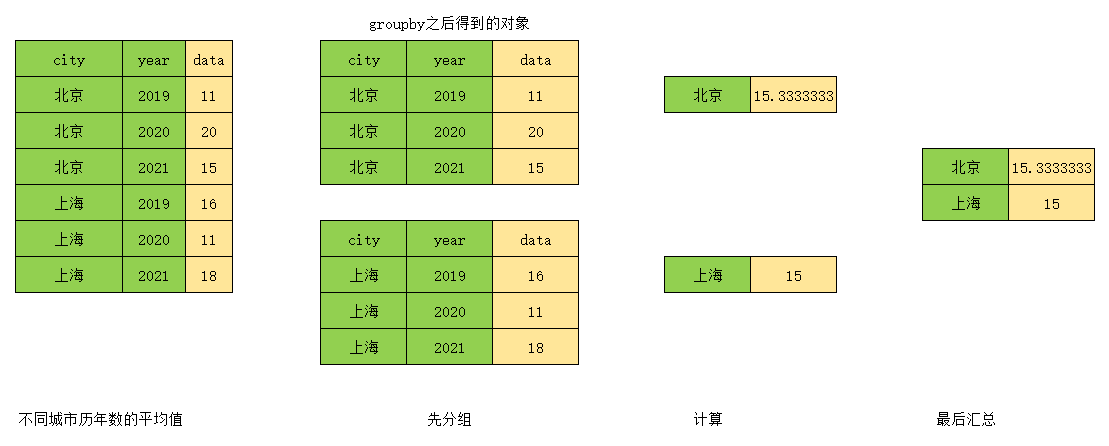

自定义函数：可以借助apply进行映射

按是否吸烟分组，观察小费慷慨程度前5名

In [57]:
tips.groupby('smoker').apply(topn, n = 5)
# 利用apply中的**kwargs参数的方式，将n = 5传入topn函数
# 结果是一个数据透视表
# groupby分组的依据和n返回结果的数据索引一起构成一个层次化的索引

total_bill   tip  tip_percent     sex smoker   day    time  size
smoker                                                                      
No     232       11.61  3.39     0.291990    Male     No   Sat  Dinner     2
       149        7.51  2.00     0.266312    Male     No  Thur   Lunch     2
       51        10.29  2.60     0.252672  Female     No   Sun  Dinner     2
       185       20.69  5.00     0.241663    Male     No   Sun  Dinner     5
       88        24.71  5.85     0.236746    Male     No  Thur   Lunch     2
Yes    172        7.25  5.15     0.710345    Male    Yes   Sun  Dinner     2
       178        9.60  4.00     0.416667  Female    Yes   Sun  Dinner     2
       67         3.07  1.00     0.325733  Female    Yes   Sat  Dinner     1
       183       23.17  6.50     0.280535    Male    Yes   Sun  Dinner     4
       109       14.31  4.00     0.279525  Female    Yes   Sat  Dinner     2

In [58]:
tips.groupby('smoker').apply(topn, n = 5).index

MultiIndex([( 'No', 232),
            ( 'No', 149),
            ( 'No',  51),
            ( 'No', 185),
            ( 'No',  88),
            ('Yes', 172),
            ('Yes', 178),
            ('Yes',  67),
            ('Yes', 183),
            ('Yes', 109)],
           names=['smoker', None])

针对小费数据集，进行以下分析
- 按周几和是否吸烟分组，统计账单总金额的前3名
- 统计吸烟和不吸烟的人群中，男女的比例各是多少
- 统计不同性别的人群中，吸烟和不吸烟的比例各是多好

In [59]:
# 按周几和是否吸烟分组，统计账单总金额的前3名
tips.groupby(['day','smoker']).apply(topn, by = 'total_bill')

total_bill    tip  tip_percent     sex smoker   day    time  \
day  smoker                                                                    
Fri  No     94        22.75   3.25     0.142857  Female     No   Fri  Dinner   
            91        22.49   3.50     0.155625    Male     No   Fri  Dinner   
            223       15.98   3.00     0.187735  Female     No   Fri   Lunch   
     Yes    95        40.17   4.73     0.117750    Male    Yes   Fri  Dinner   
            90        28.97   3.00     0.103555    Male    Yes   Fri  Dinner   
            96        27.28   4.00     0.146628    Male    Yes   Fri  Dinner   
Sat  No     212       48.33   9.00     0.186220    Male     No   Sat  Dinner   
            59        48.27   6.73     0.139424    Male     No   Sat  Dinner   
            23        39.42   7.58     0.192288    Male     No   Sat  Dinner   
     Yes    170       50.81  10.00     0.196812    Male    Yes   Sat  Dinner   
            102       44.30   2.50     0.056433  Female    Yes   Sat  Dinner   
            207       38.73   3.00     0.077459    Male    Yes   Sat  Dinner   
Sun  No     156       48.17   5.00     0.103799    Male     No   Sun  Dinner   
            112       38.07   4.00     0.105070    Male     No   Sun  Dinner   
            11        35.26   5.00     0.141804  Female     No   Sun  Dinner   
     Yes    182       45.35   3.50     0.077178    Male    Yes   Sun  Dinner   
            184       40.55   3.00     0.073983    Male    Yes   Sun  Dinner   
            180       34.65   3.68     0.106205    Male    Yes   Sun  Dinner   
Thur No     142       41.19   5.00     0.121389    Male     No  Thur   Lunch   
            85        34.83   5.17     0.148435  Female     No  Thur   Lunch   
            141       34.30   6.70     0.195335    Male     No  Thur   Lunch   
     Yes    197       43.11   5.00     0.115982  Female    Yes  Thur   Lunch   
            83        32.68   5.00     0.152999    Male    Yes  Thur   Lunch   
            192       28.44   2.56     0.090014    Male    Yes  Thur   Lunch   

                 size  
day  smoker            
Fri  No     94      2  
            91      2  
            223     3  
     Yes    95      4  
            90      2  
            96      2  
Sat  No     212     4  
            59      4  
            23      4  
     Yes    170     3  
            102     3  
            207     4  
Sun  No     156     6  
            112     3  
            11      4  
     Yes    182     3  
            184     2  
            180     4  
Thur No     142     5  
            85      4  
            141     6  
     Yes    197     4  
            83      2  
            192     2

In [60]:
# 统计吸烟和不吸烟的人群中，男女的比例各是多少
tips.groupby(['smoker', 'sex']).day.count().unstack()
# 吸烟和不吸烟的人群中，男女的人数各是多少

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


In [61]:
# 行百分比：在列上计算，用某列的值除以该行中所有列的值之和
tips.groupby(['smoker','sex']).day.count().unstack().apply(lambda x : x / x.sum(), axis = 1)

sex,Female,Male
smoker,,
No,0.357616,0.642384
Yes,0.354839,0.645161


In [62]:
# 统计不同性别的人群中，吸烟和不吸烟的比例各是多好
# 列百分比
tips.groupby(['smoker','sex']).day.count().unstack().apply(lambda x : x / x.sum(), axis = 0)

sex,Female,Male
smoker,,
No,0.62069,0.617834
Yes,0.37931,0.382166


统计不同性别的人群中，吸烟和不吸烟的人数，占总人数的百分比是多少？  
总计百分比

In [63]:
# 总人数
tips.sex.count()

244

In [64]:
tips.groupby(['smoker', 'sex']).day.count().unstack().apply(lambda x : x / tips.sex.count())

sex,Female,Male
smoker,,
No,0.221311,0.397541
Yes,0.135246,0.245902


In [65]:
# 数据透视表来实现
tips.pivot_table(
    index = 'smoker',
    columns = 'sex',
    values = 'day',
    aggfunc = 'count'
)
# .apply(lambda x : x/x.sum(), axis = 1)

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


交叉表：本质上是两个分类变量的频数数据透视表，交叉位置上是两个分类变量各类别关联的频数

## 2.2 交叉表 crosstab

    pd.crosstab(
        index,                  # 交叉表的行，常用Series
        columns,                # 交叉表的列
        values=None,             # 交叉表的值，常留空
        rownames=None,
        colnames=None,
        aggfunc=None,             # 计算，常留空
        margins: 'bool' = False,
        margins_name: 'str' = 'All',
        dropna: 'bool' = True,
        normalize=False,           # 标准化：计算各种百分比，index/columns/all 分别代表 行/列/总计百分比
    ) -> 'DataFrame'

In [66]:
# 不同性别，是否吸烟的人群，人数分别是多少
pd.crosstab(
    index = tips.smoker,
    columns = tips.sex
)

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


In [67]:
# 行百分比
pd.crosstab(
    index = tips.smoker,
    columns = tips.sex,
    normalize = 'index'
)

sex,Female,Male
smoker,,
No,0.357616,0.642384
Yes,0.354839,0.645161


In [68]:
# 列百分比
pd.crosstab(
    index = tips.smoker,
    columns = tips.sex,
    normalize = 'columns'
)

sex,Female,Male
smoker,,
No,0.62069,0.617834
Yes,0.37931,0.382166


In [69]:
# 总计百分比
pd.crosstab(
    index = tips.smoker,
    columns = tips.sex,
    normalize = 'all'
)

sex,Female,Male
smoker,,
No,0.221311,0.397541
Yes,0.135246,0.245902


<Axes: xlabel='smoker'>

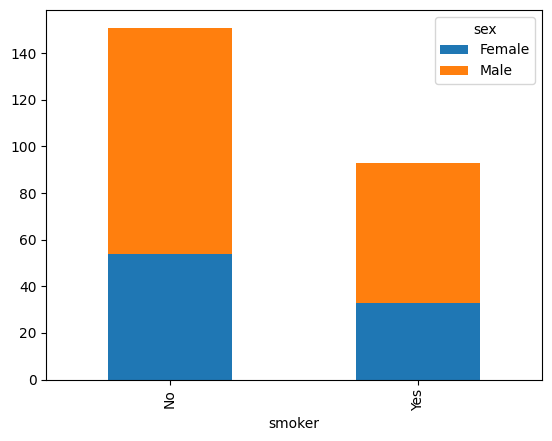

In [70]:
pd.crosstab(
    index = tips.smoker,
    columns = tips.sex,
    # normalize = 'index'
).plot(kind = 'bar', stacked = True)
# 堆叠柱状图

<Axes: xlabel='smoker'>

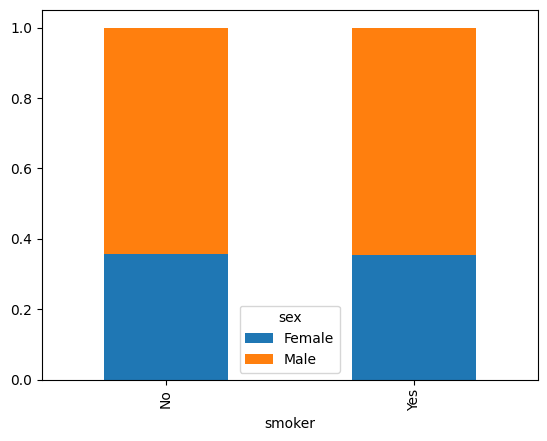

In [71]:
pd.crosstab(
    index = tips.smoker,
    columns = tips.sex,
    normalize = 'index'
).plot(kind = 'bar', stacked = True)
# 百分比堆叠柱状图

# 3.数据分箱 ：连续变量的离散化 --> 将连续变量转为分类变量 等宽、等深、自定义
## 3.1 pd.cut : 等宽分箱和自定义分箱

    pd.cut(
        x,                          # 用来进行分箱的数据，必须是一维的数据结构，可以是组、列表、Series等
        bins,                        # 分箱的设定， int / [] , 前者等宽分箱，后者是基于数值的自定义分箱
        right: 'bool' = True,             # 分箱结果是左闭右开还是左开右闭，默认情况是左开右闭 a<X<=b a<=X<b , 会影响边界值的划分
        labels=None,                   # 值标签，给分好的每一段（每箱）一个对应的标签（类别名称）
        retbins: 'bool' = False,
        precision: 'int' = 3,
        include_lowest: 'bool' = False,
        duplicates: 'str' = 'raise',         # 设置为drop，可以忽略因分割点重复导致的异常
        ordered: 'bool' = True,
    )

In [72]:
ages = np.random.randint(10,91,30)
# 用来分箱的数据

In [73]:
ages

array([35, 65, 51, 73, 59, 79, 27, 46, 69, 64, 57, 70, 77, 21, 87, 75, 32,
       40, 19, 46, 56, 31, 85, 86, 64, 45, 82, 80, 52, 80])

### 1.等宽分箱 ：bins设置为整数

In [74]:
pd.cut(ages, bins = 4)
# 返回的结果是每个数据归属的类别（箱），本质上是一个一维的数据结构

[(18.932, 36.0], (53.0, 70.0], (36.0, 53.0], (70.0, 87.0], (53.0, 70.0], ..., (36.0, 53.0], (70.0, 87.0], (70.0, 87.0], (36.0, 53.0], (70.0, 87.0]]
Length: 30
Categories (4, interval[float64, right]): [(18.932, 36.0] < (36.0, 53.0] < (53.0, 70.0] < (70.0, 87.0]]

In [75]:
type(pd.cut(ages, bins = 4))

pandas.core.arrays.categorical.Categorical

In [76]:
ages.min()
# 最小年龄

19

In [77]:
ages.max()
# 最大年龄

87

In [78]:
# 每段的宽度 = （最大值 - 最小值） / 段数
ages.ptp() / 4

17.0

Categories (4, interval[float64, right]): [(9.921, 29.75] < (29.75, 49.5] < (49.5, 69.25] < (69.25, 89.0]]  
因为返回的结果默认是一个左闭右开的区间(a<X<=b)，为了保证数据中的最小值能够包含在最低的一段中，cut会自动对最低的一段左边界值做一些处理到比最小值稍小，从而能将数据中的最小值纳入到最低的一段中

每一段（每箱）中的数据有多少个

In [79]:
tips.sex.value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [80]:
pd.cut(ages, bins = 4).value_counts()
# 不是按照值的多少进行排序，而是按照划分的顺序进行排序

(18.932, 36.0]     6
(36.0, 53.0]       6
(53.0, 70.0]       8
(70.0, 87.0]      10
Name: count, dtype: int64

等宽分箱意味着每箱之间的间距相等，但不能保证每箱中的数据量相当

### 2.基于数值的自定义分箱 ：bins设置为边界值的列表

    18岁以下是少年，18~40岁是青年，40~60岁是中年，60岁以上是老年

In [81]:
pd.cut(ages, bins = [18, 40, 60])
# bins给出的是分段的边界值，n个边界值只能划分为n-1段

[(18.0, 40.0], NaN, (40.0, 60.0], NaN, (40.0, 60.0], ..., (40.0, 60.0], NaN, NaN, (40.0, 60.0], NaN]
Length: 30
Categories (2, interval[int64, right]): [(18, 40] < (40, 60]]

In [82]:
pd.cut(ages, bins = [18, 40, 60]).value_counts()

(18, 40]    7
(40, 60]    8
Name: count, dtype: int64

In [83]:
pd.cut(ages ,bins = [0,18,40,60,100])

[(18, 40], (60, 100], (40, 60], (60, 100], (40, 60], ..., (40, 60], (60, 100], (60, 100], (40, 60], (60, 100]]
Length: 30
Categories (4, interval[int64, right]): [(0, 18] < (18, 40] < (40, 60] < (60, 100]]

In [84]:
pd.cut(ages ,bins = [0,18,40,60,100]).value_counts()

(0, 18]       0
(18, 40]      7
(40, 60]      8
(60, 100]    15
Name: count, dtype: int64

### 3.左开右闭还是左闭右开 right

In [85]:
pd.cut(ages, bins = [0, 18, 40, 60, 100], right = False)
# 从左开右闭变为左闭右开

[[18, 40), [60, 100), [40, 60), [60, 100), [40, 60), ..., [40, 60), [60, 100), [60, 100), [40, 60), [60, 100)]
Length: 30
Categories (4, interval[int64, left]): [[0, 18) < [18, 40) < [40, 60) < [60, 100)]

In [86]:
pd.cut(ages, bins = [0, 18, 40, 60, 100], right = False).value_counts()
# 将左开右闭改为左闭右开会对边界值的划分产生影响

[0, 18)       0
[18, 40)      6
[40, 60)      9
[60, 100)    15
Name: count, dtype: int64

In [87]:
ages

array([35, 65, 51, 73, 59, 79, 27, 46, 69, 64, 57, 70, 77, 21, 87, 75, 32,
       40, 19, 46, 56, 31, 85, 86, 64, 45, 82, 80, 52, 80])

In [88]:
pd.cut(ages, bins = 4)

[(18.932, 36.0], (53.0, 70.0], (36.0, 53.0], (70.0, 87.0], (53.0, 70.0], ..., (36.0, 53.0], (70.0, 87.0], (70.0, 87.0], (36.0, 53.0], (70.0, 87.0]]
Length: 30
Categories (4, interval[float64, right]): [(18.932, 36.0] < (36.0, 53.0] < (53.0, 70.0] < (70.0, 87.0]]

In [89]:
pd.cut(ages, bins = 4 ,right = False)
# 将左开右闭改为左闭右开之后，最小值的左边界不再进行处理，转而对最大值的右边界进行处理，以便能能将最大值容纳在最高的一段中

[[19.0, 36.0), [53.0, 70.0), [36.0, 53.0), [70.0, 87.068), [53.0, 70.0), ..., [36.0, 53.0), [70.0, 87.068), [70.0, 87.068), [36.0, 53.0), [70.0, 87.068)]
Length: 30
Categories (4, interval[float64, left]): [[19.0, 36.0) < [36.0, 53.0) < [53.0, 70.0) < [70.0, 87.068)]

### 4.值标签 labels

In [90]:
pd.cut(ages, bins = [0, 18, 40, 60, 100], right = False)
# 返回的结果是每个年龄所在的年龄段

[[18, 40), [60, 100), [40, 60), [60, 100), [40, 60), ..., [40, 60), [60, 100), [60, 100), [40, 60), [60, 100)]
Length: 30
Categories (4, interval[int64, left]): [[0, 18) < [18, 40) < [40, 60) < [60, 100)]

In [91]:
# 18岁以下是少年，18~40岁是青年，40~60岁是中年，60岁以上是老年
pd.cut(
    ages,
    bins = [0, 18, 40, 60, 100],
    right = False,
    labels = ['少年', '青年', '中年', '老年']
)
# 设置labels之后，cut直接返回每个数据对应的值标签（年龄段名称）

['青年', '老年', '中年', '老年', '中年', ..., '中年', '老年', '老年', '中年', '老年']
Length: 30
Categories (4, object): ['少年' < '青年' < '中年' < '老年']

In [92]:
# # 18岁以下是少年，18~40岁是青年，40~60岁是中年，60岁以上是老年
# pd.cut(
#     ages,
#     bins = [0, 18, 40, 60, 100],
#     right = False,
#     labels = ['儿童', '少年', '青年', '中年', '老年']
# )
# # 设置labels之后，cut直接返回每个数据对应的值标签（年龄段名称）
# 报错，labels中的标签数量要和划分的段数一一对应，也就是比bins中的边界值少1

In [93]:
pd.cut(
    ages,
    bins = [0, 18, 40, 60, 100],
    right = False,
    labels = ['少年', '青年', '中年', '老年']
).value_counts()

少年     0
青年     6
中年     9
老年    15
Name: count, dtype: int64

### 5.边界重复是否报错 duplicates

In [94]:
pd.cut(
    ages,
    bins = [0, 18, 40, 60, 100],
    right = False,
    labels = ['少年', '青年', '中年', '老年']
)

['青年', '老年', '中年', '老年', '中年', ..., '中年', '老年', '老年', '中年', '老年']
Length: 30
Categories (4, object): ['少年' < '青年' < '中年' < '老年']

In [95]:
# pd.cut(
#     ages,
#     bins = [0, 18, 40, 60, 60, 100],
#     right = False,
#     labels = ['少年', '青年', '中年', '老年']
# )
# 报错，边界值必须唯一

In [96]:
pd.cut(
    ages,
    bins = [0, 18, 40, 60, 60, 100],
    right = False,
    labels = ['少年', '青年', '中年', '老年'],
    duplicates = 'drop'  # 删除重复的边界值
)

['青年', '老年', '中年', '老年', '中年', ..., '中年', '老年', '老年', '中年', '老年']
Length: 30
Categories (4, object): ['少年' < '青年' < '中年' < '老年']

## 3.2 pd.qcut : 等深分箱或者按比例的自定义分箱

    pd.qcut(
        x,                      # 分箱的数据
        q,                      # 分箱的设定，int是等深分箱（等比例），浮点数的列表是按比例进行自定义分箱
        labels=None,
        retbins: 'bool' = False,
        precision: 'int' = 3,
        duplicates: 'str' = 'raise',
    )

In [97]:
ages2 = np.random.randint(10,81,200)

In [98]:
ages2

array([40, 33, 80, 30, 33, 63, 53, 72, 51, 54, 12, 47, 60, 39, 60, 53, 37,
       74, 77, 40, 73, 42, 61, 59, 22, 48, 75, 20, 17, 21, 16, 20, 37, 26,
       32, 23, 23, 35, 22, 31, 18, 30, 73, 12, 47, 78, 48, 76, 68, 20, 10,
       75, 29, 44, 22, 71, 29, 63, 38, 26, 27, 59, 66, 58, 77, 32, 45, 48,
       57, 47, 63, 55, 41, 71, 31, 24, 25, 70, 27, 62, 28, 50, 21, 28, 21,
       17, 19, 79, 60, 36, 32, 52, 72, 57, 78, 41, 51, 64, 63, 79, 37, 69,
       43, 48, 17, 73, 28, 49, 15, 34, 56, 56, 16, 51, 11, 35, 25, 64, 66,
       20, 62, 34, 38, 43, 45, 19, 39, 55, 29, 48, 57, 57, 41, 11, 15, 30,
       17, 45, 27, 57, 13, 13, 46, 79, 13, 25, 20, 66, 52, 68, 49, 64, 34,
       53, 49, 57, 37, 29, 50, 31, 78, 23, 54, 74, 27, 43, 68, 57, 63, 16,
       45, 62, 24, 34, 72, 64, 16, 68, 64, 59, 21, 62, 56, 14, 80, 79, 35,
       44, 25, 11, 61, 54, 74, 70, 27, 17, 11, 58, 37, 71])

### 1.等深分箱 q设置为整数

In [99]:
#  0~100岁之间，按照25岁一档进行划分
# 等宽
pd.cut(ages2, bins = range(0,101,25))

[(25, 50], (25, 50], (75, 100], (25, 50], (25, 50], ..., (0, 25], (0, 25], (50, 75], (25, 50], (50, 75]]
Length: 200
Categories (4, interval[int64, right]): [(0, 25] < (25, 50] < (50, 75] < (75, 100]]

In [100]:
# 等宽
pd.cut(ages2, bins = range(0,101,25)).value_counts()

(0, 25]      46
(25, 50]     71
(50, 75]     71
(75, 100]    12
Name: count, dtype: int64

In [101]:
# 分为4段，每段的人数要大致相当
pd.qcut(ages2, q = 4)

[(27.0, 45.0], (27.0, 45.0], (61.25, 80.0], (27.0, 45.0], (27.0, 45.0], ..., (9.999, 27.0], (9.999, 27.0], (45.0, 61.25], (27.0, 45.0], (61.25, 80.0]]
Length: 200
Categories (4, interval[float64, right]): [(9.999, 27.0] < (27.0, 45.0] < (45.0, 61.25] < (61.25, 80.0]]

In [102]:
pd.qcut(ages2, q = 4).value_counts()
# 按照人数的25%一段进行划分（四分位分箱）

(9.999, 27.0]    53
(27.0, 45.0]     50
(45.0, 61.25]    47
(61.25, 80.0]    50
Name: count, dtype: int64

In [103]:
# 获取数据的四分位数
np.quantile(ages2,  q = [0.25,0.5,0.75])

array([27.  , 45.  , 61.25])

In [104]:
pd.Series(ages2).describe()

count    200.00000
mean      44.34500
std       20.10315
min       10.00000
25%       27.00000
50%       45.00000
75%       61.25000
max       80.00000
dtype: float64

In [105]:
pd.qcut(ages2, q = 10).value_counts()

(9.999, 17.0]    22
(17.0, 23.8]     18
(23.8, 29.7]     20
(29.7, 37.0]     24
(37.0, 45.0]     19
(45.0, 51.4]     17
(51.4, 57.3]     20
(57.3, 64.0]     24
(64.0, 72.1]     16
(72.1, 80.0]     20
Name: count, dtype: int64

### 2.按比例的自定义分箱：q设置为0~1之间的小数列表，列表中的值是0~100%之间的比例划分

In [106]:
# 四分位分箱
pd.qcut(ages2, q = [0, 0.25, 0.5, 0.75, 1]).value_counts()

(9.999, 27.0]    53
(27.0, 45.0]     50
(45.0, 61.25]    47
(61.25, 80.0]    50
Name: count, dtype: int64

In [107]:
# 分成2:2:3:3
pd.qcut(ages2, q = [0,0.2, 0.4,0.7,1]).value_counts()

(9.999, 23.8]    40
(23.8, 37.0]     44
(37.0, 57.3]     56
(57.3, 80.0]     60
Name: count, dtype: int64

## 3.3 将分箱操作和pandas数据结构结合起来

In [108]:
type(ages2)

numpy.ndarray

In [109]:
# 将数组包装成DataFrame
df_age = pd.DataFrame(ages2, columns = ['age'])

In [110]:
df_age

,age
0,40
1,33
2,80
3,30
4,33
...,...
195,17
196,11
197,58
198,37


In [111]:
# pd.cut(df_age, 4)
# 报错
# DataFrame哪怕只有一列，也是一个二维的数据结构 
# cut/qcut只能针对Series进行

In [112]:
df_age.shape

(200, 1)

In [113]:
pd.cut(df_age.age, 4)

0      (27.5, 45.0]
1      (27.5, 45.0]
2      (62.5, 80.0]
3      (27.5, 45.0]
4      (27.5, 45.0]
           ...     
195    (9.93, 27.5]
196    (9.93, 27.5]
197    (45.0, 62.5]
198    (27.5, 45.0]
199    (62.5, 80.0]
Name: age, Length: 200, dtype: category
Categories (4, interval[float64, right]): [(9.93, 27.5] < (27.5, 45.0] < (45.0, 62.5] < (62.5, 80.0]]

In [114]:
type(pd.cut(df_age.age, 4))
# 对Series进行分箱，返回的结果是由分好段的数据构成的Series

pandas.core.series.Series

In [115]:
pd.cut(
    df_age.age,
    bins = [0, 18, 40, 60, 100],
    right = False,
    labels = ['少年', '青年', '中年', '老年']
)
# 转换的结果是一个有序分类变量

0      中年
1      青年
2      老年
3      青年
4      青年
       ..
195    少年
196    少年
197    中年
198    青年
199    老年
Name: age, Length: 200, dtype: category
Categories (4, object): ['少年' < '青年' < '中年' < '老年']

In [116]:
df_age['年龄段'] = pd.cut(
    df_age.age,
    bins = [0, 18, 40, 60, 100],
    right = False,
    labels = ['少年', '青年', '中年', '老年']
)
# 把分好段的数据添加到DataFrame中：为数据打标签

In [117]:
df_age

,age,年龄段
0,40,中年
1,33,青年
2,80,老年
3,30,青年
4,33,青年
...,...,...
195,17,少年
196,11,少年
197,58,中年
198,37,青年


In [118]:
df_age.sort_values(by = '年龄段')

,age,年龄段
136,17,少年
28,17,少年
30,16,少年
141,13,少年
43,12,少年
...,...,...
79,62,老年
77,70,老年
73,71,老年
97,64,老年


分箱和可视化的关系

<Axes: >

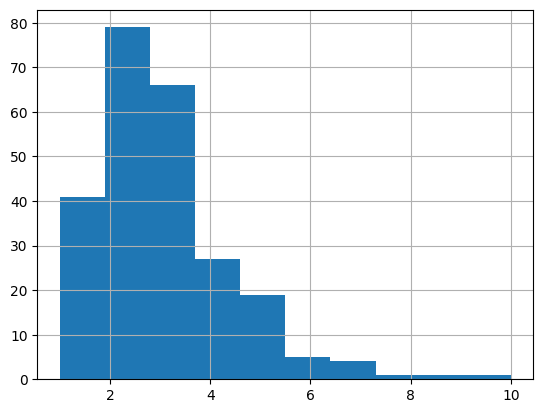

In [119]:
# 小费数据集中，小费的分布情况 直方图
tips.tip.hist(bins = 10)

<Axes: >

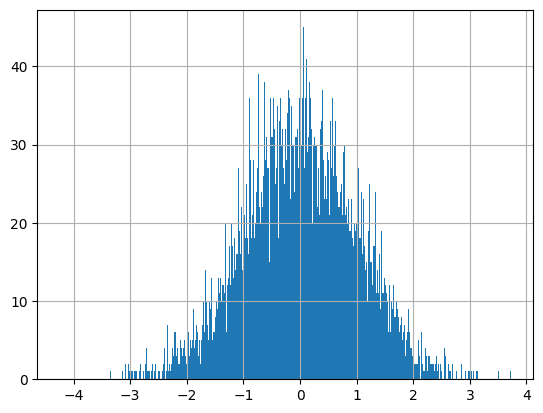

In [120]:
pd.Series(np.random.randn(10000)).hist(bins = 1000)

将小费按升序排列，等宽划分为10段，观察每段中的数据量

In [121]:
pd.cut(tips.tip, bins = 10).value_counts().sort_index()

tip
(0.991, 1.9]    41
(1.9, 2.8]      79
(2.8, 3.7]      66
(3.7, 4.6]      27
(4.6, 5.5]      19
(5.5, 6.4]       5
(6.4, 7.3]       4
(7.3, 8.2]       1
(8.2, 9.1]       1
(9.1, 10.0]      1
Name: count, dtype: int64

<Axes: xlabel='tip'>

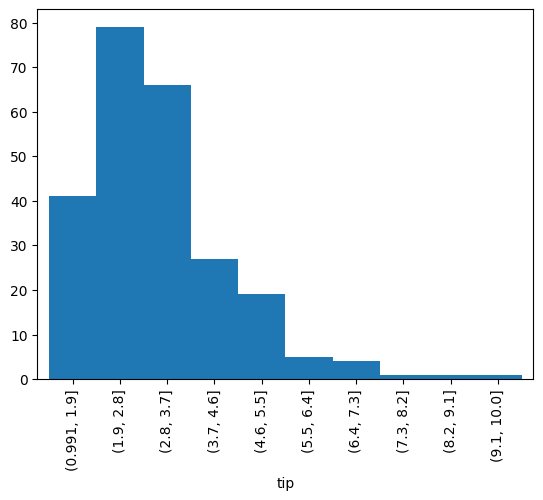

In [122]:
pd.cut(tips.tip, bins = 10).value_counts().sort_index().plot(kind = 'bar', width = 1)